In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../..')

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from hydramuscle.model.smc import SMC
from hydramuscle.model.layer import Layer

In [4]:
def calc_prop_range(data, step_time=1, thres=0.1):
    nsteps, numx, numy = data.shape
    
    # Extract longitudinal and circular data separately
    data_x = data[:, :, 0]
    data_y = data[:, numx // 2, :]
    
    # Track wavefronts
    wavefronts_x = np.zeros(nsteps)
    wavefronts_y = np.zeros(nsteps)
    
    for i in range(nsteps):
        for k in range(numx - 1, -1, -1):
            if data_x[i, k] > thres:
                wavefronts_x[i] = k
                break
        
        for k in range(numy):
            if data_y[i, k] > thres:
                wavefronts_y[i] = k
    
    # Calculate range
    range_x = max(wavefronts_x - numx // 2)
    range_y = max(wavefronts_y)
    
    return range_x, range_y #, wavefronts_x, wavefronts_y

In [5]:
numx = 30
numy = 60
T = 50
dt = 0.0002
save_interval = 5000

In [6]:
# Initiation data
gip3x_range = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
gip3y_range = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
calcium = np.zeros((len(gip3x_range), 
                    len(gip3y_range), 
                    numx * numy * int(T/dt/save_interval)))

# Construct layer
smc = SMC(T=T, dt=dt, k_ipr=0.2, s0=100, k_deg=0.05)
layer = Layer(smc, 
              numx=numx, 
              numy=numy, 
              gip3x=0.0, 
              gip3y=0.0, 
              gcx=1000, 
              gcy=1000,
              save_interval=save_interval)
layer.set_stim_pattern("slow", xmin=13, xmax=17, ymin=0, ymax=4,
                          stim_times=[0])

# Tuning parameters
for i, gip3x in enumerate(gip3x_range):
    for j, gip3y in enumerate(gip3y_range):
        
        layer._gip3x = gip3x
        layer._gip3y = gip3y
        layer._set_conn_mat()
        
        print(i, j)
        
        sol = layer.run()
        calcium[i, j] = sol.reshape(-1)

  0%|          | 136/250000 [00:00<03:04, 1355.39it/s]

0 0


  0%|          | 188/250000 [00:00<02:13, 1872.83it/s]

0 1


  0%|          | 196/250000 [00:00<02:07, 1957.72it/s]

0 2


  0%|          | 148/250000 [00:00<02:49, 1478.23it/s]

0 3


  0%|          | 201/250000 [00:00<02:04, 2004.06it/s]

0 4


  0%|          | 184/250000 [00:00<02:17, 1823.15it/s]

0 5


  0%|          | 208/250000 [00:00<02:00, 2071.55it/s]

0 6


  0%|          | 172/250000 [00:00<02:25, 1713.56it/s]

0 7


  0%|          | 209/250000 [00:00<01:59, 2083.79it/s]

0 8


  0%|          | 174/250000 [00:00<02:24, 1733.04it/s]

0 9


  0%|          | 221/250000 [00:00<01:53, 2202.47it/s]

0 10


  0%|          | 222/250000 [00:00<01:52, 2212.85it/s]

1 0


  0%|          | 219/250000 [00:00<01:54, 2183.30it/s]

1 1


  0%|          | 219/250000 [00:00<01:54, 2182.32it/s]

1 2


  0%|          | 179/250000 [00:00<02:20, 1780.99it/s]

1 3


  0%|          | 185/250000 [00:00<02:15, 1845.54it/s]

1 4


  0%|          | 200/250000 [00:00<02:05, 1989.18it/s]

1 5


  0%|          | 180/250000 [00:00<02:18, 1798.49it/s]

1 6


  0%|          | 199/250000 [00:00<02:05, 1984.66it/s]

1 7


  0%|          | 142/250000 [00:00<02:56, 1417.07it/s]

1 8


  0%|          | 202/250000 [00:00<02:03, 2015.59it/s]

1 9


  0%|          | 202/250000 [00:00<02:04, 2010.84it/s]

1 10


  0%|          | 203/250000 [00:00<02:03, 2021.51it/s]

2 0


  0%|          | 202/250000 [00:00<02:03, 2015.83it/s]

2 1


  0%|          | 192/250000 [00:00<02:10, 1919.62it/s]

2 2


  0%|          | 188/250000 [00:00<02:13, 1878.10it/s]

2 3


  0%|          | 205/250000 [00:00<02:02, 2037.59it/s]

2 4


  0%|          | 201/250000 [00:00<02:04, 2009.92it/s]

2 5


  0%|          | 192/250000 [00:00<02:10, 1916.15it/s]

2 6


  0%|          | 207/250000 [00:00<02:01, 2061.45it/s]

2 7


  0%|          | 145/250000 [00:00<02:52, 1446.41it/s]

2 8


  0%|          | 206/250000 [00:00<02:01, 2057.68it/s]

2 9


  0%|          | 144/250000 [00:00<02:54, 1434.12it/s]

2 10


  0%|          | 200/250000 [00:00<02:05, 1997.52it/s]

3 0


  0%|          | 183/250000 [00:00<02:16, 1824.36it/s]

3 1


  0%|          | 208/250000 [00:00<02:00, 2073.32it/s]

3 2


  0%|          | 209/250000 [00:00<01:59, 2084.49it/s]

3 3


  0%|          | 205/250000 [00:00<02:02, 2045.40it/s]

3 4


  0%|          | 193/250000 [00:00<02:09, 1926.58it/s]

3 5


  0%|          | 206/250000 [00:00<02:01, 2053.57it/s]

3 6


  0%|          | 201/250000 [00:00<02:04, 2006.91it/s]

3 7


  0%|          | 202/250000 [00:00<02:04, 2012.73it/s]

3 8


  0%|          | 206/250000 [00:00<02:01, 2057.53it/s]

3 9


  0%|          | 272/250000 [00:00<03:01, 1375.98it/s]

3 10


  0%|          | 202/250000 [00:00<02:04, 2012.77it/s]

4 0


  0%|          | 200/250000 [00:00<02:05, 1990.84it/s]

4 1


  0%|          | 199/250000 [00:00<02:05, 1983.26it/s]

4 2


  0%|          | 203/250000 [00:00<02:03, 2021.33it/s]

4 3


  0%|          | 200/250000 [00:00<02:05, 1996.48it/s]

4 4


  0%|          | 201/250000 [00:00<02:04, 2009.56it/s]

4 5


  0%|          | 438/250000 [00:00<01:53, 2196.79it/s]

4 6


  0%|          | 218/250000 [00:00<01:54, 2177.43it/s]

4 7


  0%|          | 429/250000 [00:00<01:55, 2153.39it/s]

4 8


  0%|          | 218/250000 [00:00<01:55, 2171.08it/s]

4 9


  0%|          | 220/250000 [00:00<01:53, 2193.31it/s]

4 10


  0%|          | 438/250000 [00:00<01:53, 2198.59it/s]

5 0


  0%|          | 191/250000 [00:00<02:11, 1905.87it/s]

5 1


  0%|          | 185/250000 [00:00<02:15, 1842.91it/s]

5 2


  0%|          | 169/250000 [00:00<02:28, 1687.43it/s]

5 3


  0%|          | 164/250000 [00:00<02:32, 1634.72it/s]

5 4


  0%|          | 195/250000 [00:00<02:08, 1948.26it/s]

5 5


  0%|          | 193/250000 [00:00<02:09, 1924.96it/s]

5 6


  0%|          | 197/250000 [00:00<02:07, 1962.91it/s]

5 7


  0%|          | 211/250000 [00:00<01:58, 2102.66it/s]

5 8


  0%|          | 203/250000 [00:00<02:03, 2028.72it/s]

5 9


  0%|          | 201/250000 [00:00<02:04, 2004.39it/s]

5 10


  0%|          | 401/250000 [00:00<02:03, 2019.96it/s]

6 0


  0%|          | 203/250000 [00:00<02:03, 2025.44it/s]

6 1


  0%|          | 198/250000 [00:00<02:06, 1972.55it/s]

6 2


  0%|          | 180/250000 [00:00<02:19, 1796.60it/s]

6 3


  0%|          | 196/250000 [00:00<02:07, 1952.40it/s]

6 4


  0%|          | 206/250000 [00:00<02:01, 2059.32it/s]

6 5


  0%|          | 200/250000 [00:00<02:05, 1992.89it/s]

6 6


  0%|          | 216/250000 [00:00<01:56, 2153.22it/s]

6 7


  0%|          | 424/250000 [00:00<01:58, 2099.41it/s]

6 8


  0%|          | 213/250000 [00:00<01:57, 2121.89it/s]

6 9


  0%|          | 192/250000 [00:00<02:10, 1914.91it/s]

6 10


  0%|          | 155/250000 [00:00<02:41, 1548.02it/s]

7 0


  0%|          | 194/250000 [00:00<02:08, 1936.92it/s]

7 1


  0%|          | 194/250000 [00:00<02:09, 1931.44it/s]

7 2


  0%|          | 189/250000 [00:00<02:12, 1889.70it/s]

7 3


  0%|          | 193/250000 [00:00<02:09, 1922.27it/s]

7 4


  0%|          | 168/250000 [00:00<02:29, 1675.94it/s]

7 5


  0%|          | 208/250000 [00:00<02:00, 2071.94it/s]

7 6


  0%|          | 211/250000 [00:00<01:58, 2101.05it/s]

7 7


  0%|          | 209/250000 [00:00<01:59, 2088.76it/s]

7 8


  0%|          | 177/250000 [00:00<02:21, 1762.60it/s]

7 9


  0%|          | 221/250000 [00:00<01:53, 2202.67it/s]

7 10


  0%|          | 208/250000 [00:00<02:00, 2070.99it/s]

8 0


  0%|          | 133/250000 [00:00<03:08, 1326.12it/s]

8 1


  0%|          | 146/250000 [00:00<02:51, 1454.15it/s]

8 2


  0%|          | 178/250000 [00:00<02:20, 1774.68it/s]

8 3


  0%|          | 183/250000 [00:00<02:17, 1822.15it/s]

8 4


  0%|          | 186/250000 [00:00<02:14, 1859.52it/s]

8 5


  0%|          | 156/250000 [00:00<02:40, 1559.30it/s]

8 6


  0%|          | 191/250000 [00:00<02:11, 1906.53it/s]

8 7


  0%|          | 190/250000 [00:00<02:11, 1899.24it/s]

8 8


  0%|          | 203/250000 [00:00<02:03, 2028.28it/s]

8 9


  0%|          | 152/250000 [00:00<02:44, 1518.72it/s]

8 10


  0%|          | 182/250000 [00:00<02:17, 1816.44it/s]

9 0


  0%|          | 169/250000 [00:00<02:27, 1688.61it/s]

9 1


  0%|          | 201/250000 [00:00<02:04, 2008.68it/s]

9 2


  0%|          | 188/250000 [00:00<02:13, 1877.86it/s]

9 3


  0%|          | 189/250000 [00:00<02:12, 1889.04it/s]

9 4


  0%|          | 214/250000 [00:00<01:57, 2125.21it/s]

9 5


  0%|          | 192/250000 [00:00<02:10, 1918.30it/s]

9 6


  0%|          | 185/250000 [00:00<02:15, 1845.24it/s]

9 7


  0%|          | 199/250000 [00:00<02:05, 1988.15it/s]

9 8


  0%|          | 177/250000 [00:00<02:21, 1760.35it/s]

9 9


  0%|          | 168/250000 [00:00<02:29, 1670.25it/s]

9 10


  0%|          | 213/250000 [00:00<01:57, 2127.79it/s]

10 0


  0%|          | 220/250000 [00:00<01:53, 2197.35it/s]

10 1


  0%|          | 209/250000 [00:00<01:59, 2085.92it/s]

10 2


  0%|          | 132/250000 [00:00<03:09, 1319.01it/s]

10 3


  0%|          | 201/250000 [00:00<02:04, 2007.09it/s]

10 4


  0%|          | 203/250000 [00:00<02:03, 2025.99it/s]

10 5


  0%|          | 199/250000 [00:00<02:05, 1989.72it/s]

10 6


  0%|          | 197/250000 [00:00<02:07, 1961.70it/s]

10 7


  0%|          | 189/250000 [00:00<02:12, 1882.96it/s]

10 8


  0%|          | 186/250000 [00:00<02:14, 1859.66it/s]

10 9


  0%|          | 194/250000 [00:00<02:09, 1934.41it/s]

10 10


100%|██████████| 250000/250000 [02:07<00:00, 1959.50it/s]


In [9]:
calcium = calcium.reshape(len(gip3x_range), len(gip3y_range), int(T/dt/save_interval), numx, numy)

In [10]:
import pickle
with open('../results/data/calcium.pickle', 'wb') as handle:
    pickle.dump(calcium, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [268]:
ranges_slow_x = np.zeros((len(gip3x_range), len(gip3y_range)))
ranges_slow_y = np.zeros((len(gip3x_range), len(gip3y_range)))

for i in range(len(gip3x_range)):
    for j in range(len(gip3y_range)):
        range_x, range_y = calc_prop_range(calcium[i, j], thres=0.1)
        ranges_slow_x[i, j], ranges_slow_y[i, j] = range_x, range_y

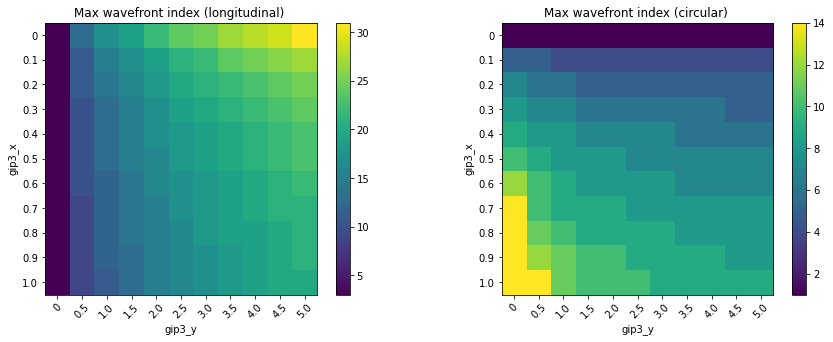

In [272]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
im1 = ax1.imshow(ranges_slow_y)
ax1.set_xticks(range(0, 11))
ax1.set_xticklabels(gip3y_range, rotation=45)
ax1.set_yticks(range(0, 11))
ax1.set_yticklabels(gip3x_range)
ax1.set_xlabel('gip3_y')
ax1.set_ylabel('gip3_x')
fig.colorbar(im1, ax=ax1, fraction=0.045)
ax1.set_title('Max wavefront index (longitudinal) ')

ax2 = fig.add_subplot(122)
im2 = ax2.imshow(ranges_slow_x)
ax2.set_xticks(range(0, 11))
ax2.set_xticklabels(gip3y_range, rotation=45)
ax2.set_yticks(range(0, 11))
ax2.set_yticklabels(gip3x_range)
ax2.set_xlabel('gip3_y')
ax2.set_ylabel('gip3_x')
fig.colorbar(im2, ax=ax2, fraction=0.045)
ax2.set_title('Max wavefront index (circular) ')
plt.savefig('../results/figures/max_range_slow.pdf', bbox_inches='tight')
plt.show()